<center><h1>Ruiqi Wang</h1></center>
<center><h1>Last_First_HW1</h1></center>
<br>
<center><font size="4">Vertebral Column Data </font></center>

### (a) Download Data

Package imports 

In [449]:
import pandas as pd
import numpy as np 

Get the Vertebral Column Data Set

In [451]:
column_name = ["pelvic_incidence","pelvic_tilt","lumbar_lordosis_angle","sacral_slope","pelvic_radius","grade_of_spondylolisthesis","Class_Labelled"]
column_2C = pd.read_csv('column_2C.dat',delim_whitespace=True, names=column_name)
column_3C = pd.read_csv('column_3C.dat',delim_whitespace=True, names=column_name)
column_2C.head()

/var/folders/tx/xjw_jsw55sddmv703my07cch0000gn/T/ipykernel_38306/1181294448.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  column_2C = pd.read_csv('column_2C.dat',delim_whitespace=True, names=column_name)
/var/folders/tx/xjw_jsw55sddmv703my07cch0000gn/T/ipykernel_38306/1181294448.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  column_3C = pd.read_csv('column_3C.dat',delim_whitespace=True, names=column_name)


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,Class_Labelled
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB


### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

/var/folders/tx/xjw_jsw55sddmv703my07cch0000gn/T/ipykernel_38306/2161259052.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column_2C['Class_Labelled'] = column_2C['Class_Labelled'].replace({"NO":0,"AB":1})


Text(0.5, 1.02, 'Scatterplots of Independent Variables (by Class)')

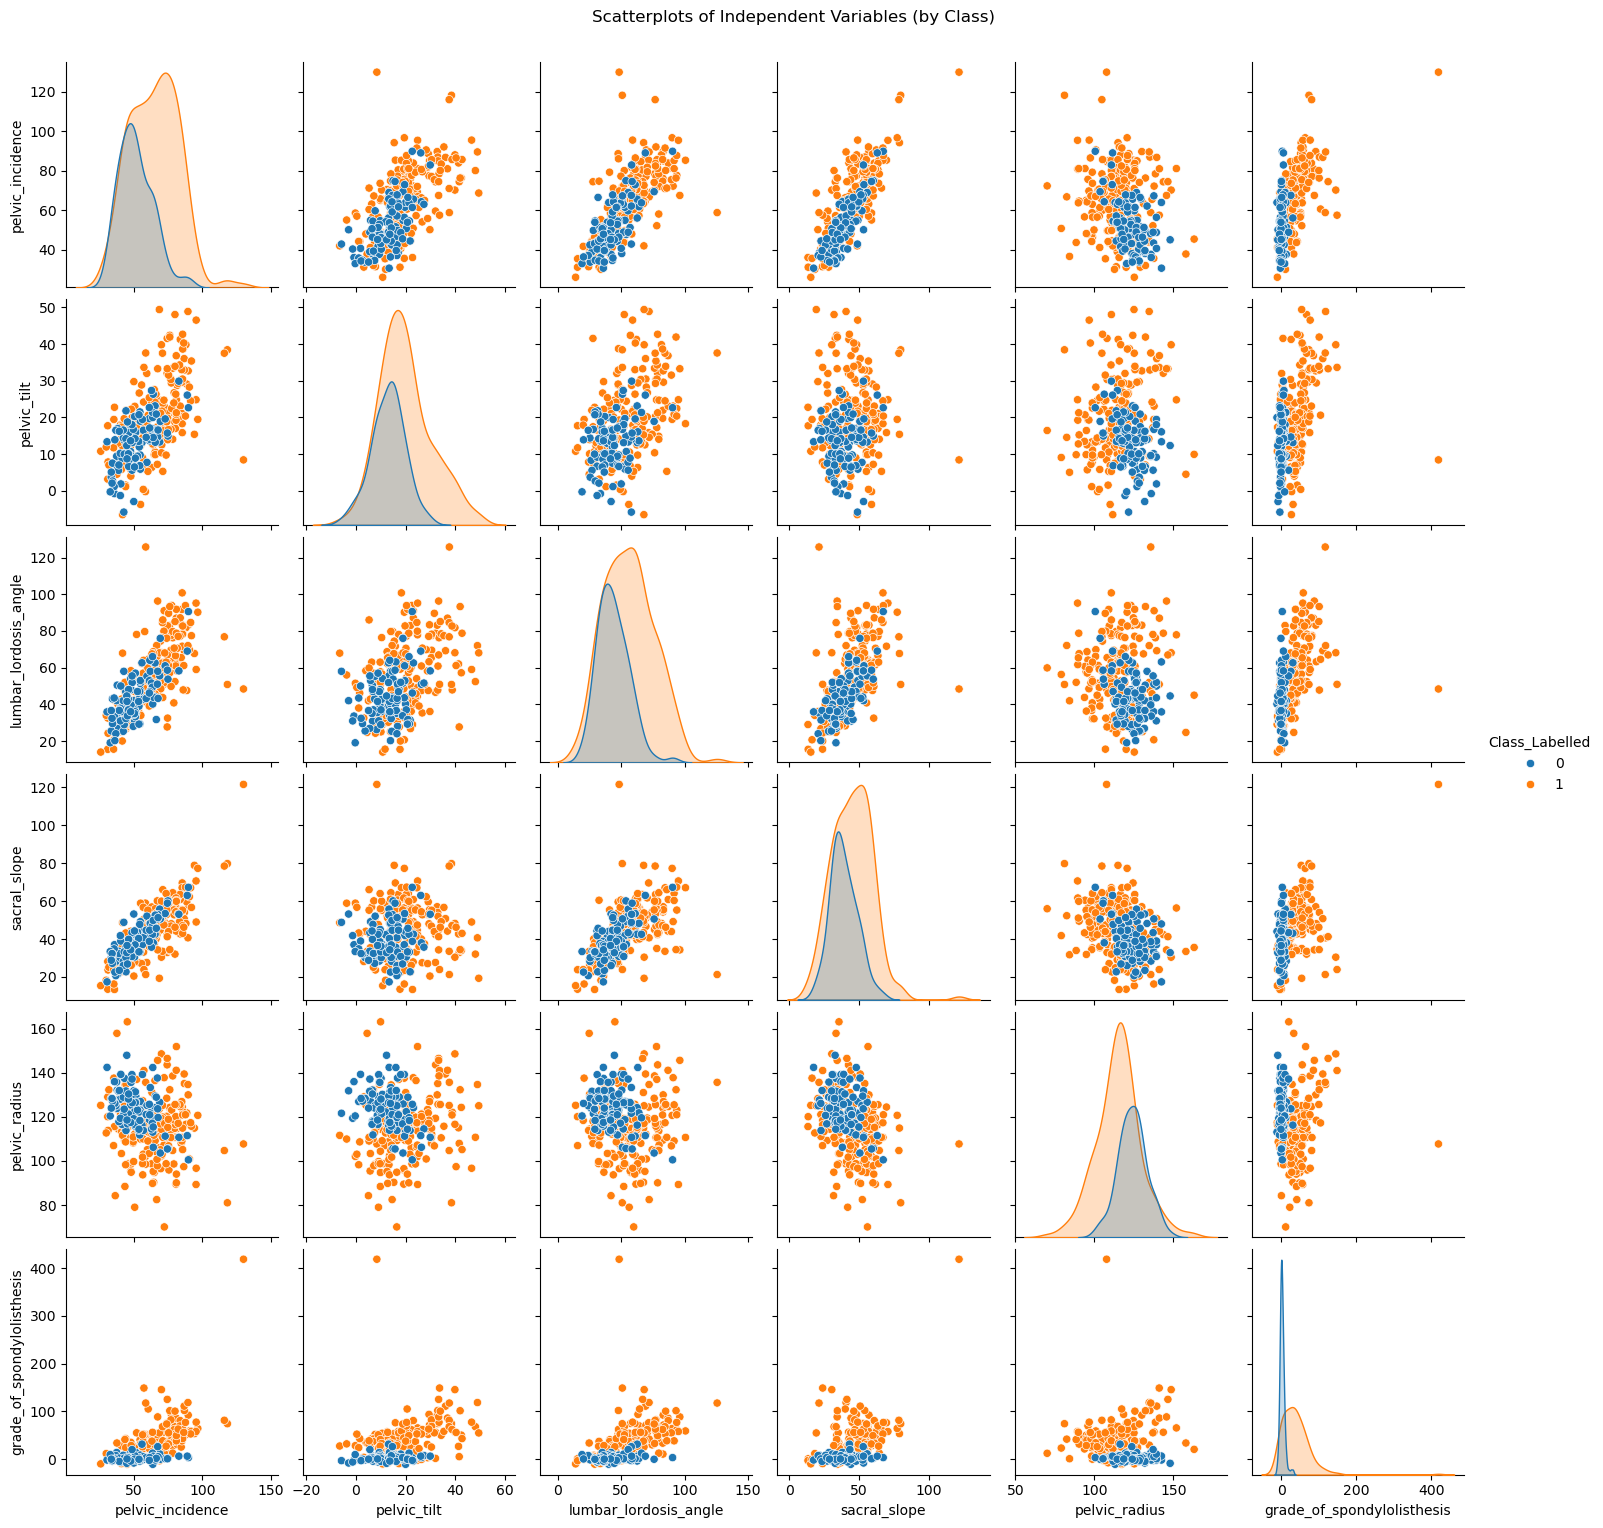

In [454]:
column_2C['Class_Labelled'] = column_2C['Class_Labelled'].replace({"NO":0,"AB":1})
import seaborn as sns
sns.pairplot(
    data=column_2C,
    hue="Class_Labelled"     
)
plt.suptitle("Scatterplots of Independent Variables (by Class)", y=1.02)

#### ii. Boxplots

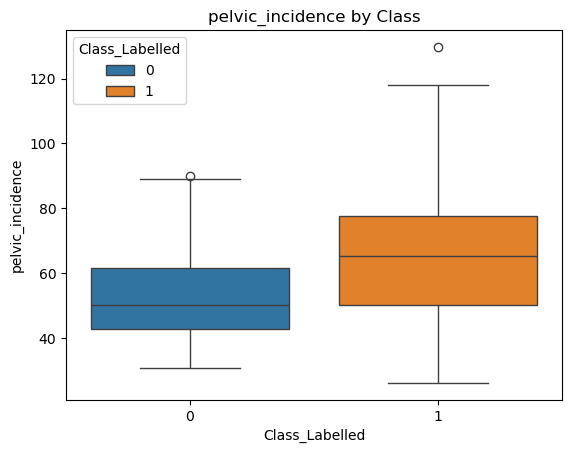

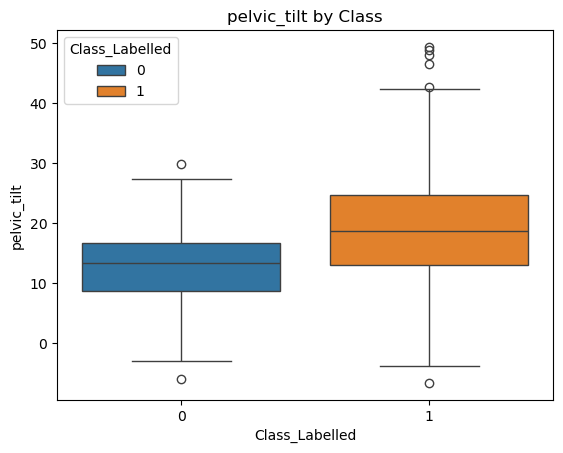

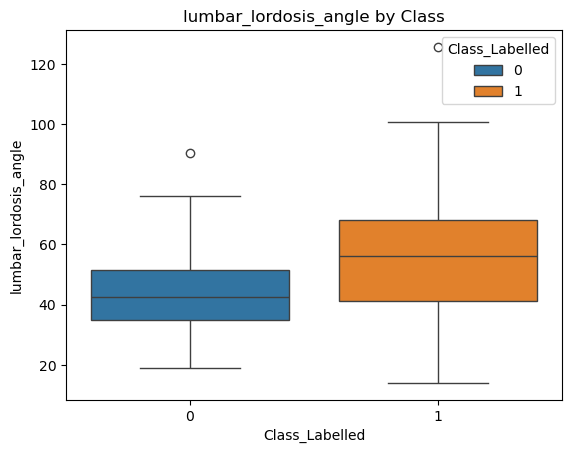

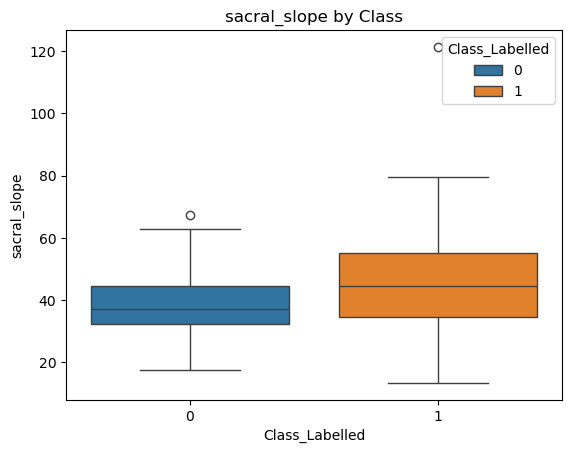

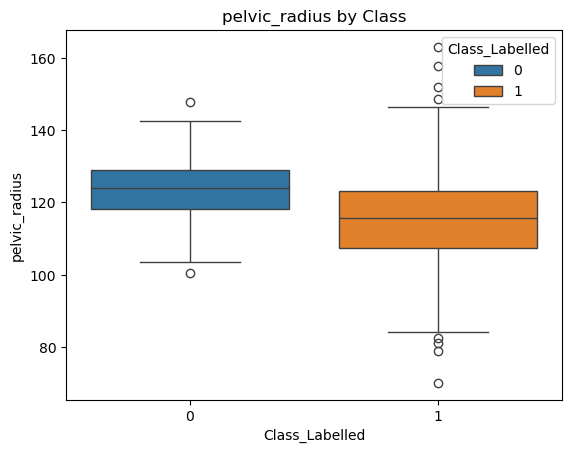

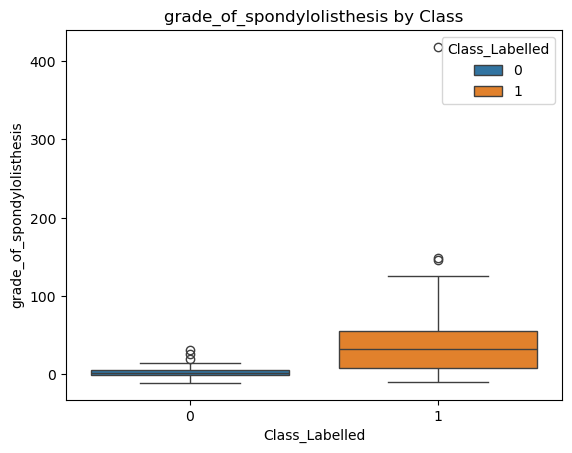

In [456]:
in_var = column_2C.columns[:-1]
for in_var in column_2C.columns[:-1]:
  sns.boxplot(x= "Class_Labelled", y=in_var, data=column_2C, hue="Class_Labelled")
  plt.title(f"{in_var} by Class")
  plt.show() 

#### iii. Split Data Set

In [458]:
column_2C['Class_Labelled'] = column_2C['Class_Labelled'].replace({"NO":0,"AB":1})
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
train = pd.concat([column_2C[column_2C["Class_Labelled"] == 0].head(70),
                   column_2C[column_2C["Class_Labelled"]== 1].head(140)])
test = pd.concat([column_2C[column_2C["Class_Labelled"] == 0].iloc[70:],
                  column_2C[column_2C["Class_Labelled"]== 1].iloc[140:]])
x_train.shape
x_train = train.drop('Class_Labelled',axis=1)
y_train = train['Class_Labelled'] 
x_test = test.drop('Class_Labelled',axis=1)
y_test = test['Class_Labelled'] 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test) 
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape) 
print("y_train counts:\n", y_train.value_counts())
print("y_test counts:\n", y_test.value_counts())


x_train shape: (210, 6)
x_test shape: (100, 6)
y_train counts:
 Class_Labelled
1    140
0     70
Name: count, dtype: int64
y_test counts:
 Class_Labelled
1    70
0    30
Name: count, dtype: int64


### (c) Classification

#### i. Euclidean Metric

In [461]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(metric='euclidean')
knn.fit(x_train, y_train)


KNeighborsClassifier(metric='euclidean')

#### ii. Test Data

Best k: 4, with test error: 0.12
Confusion Matrix:
 [[22  8]
 [ 4 66]]
true positive rate:
 0.9428571428571428
true negative rate:
 0.7333333333333333
precision:
 0.8918918918918919
F1_score:
 0.9166666666666667


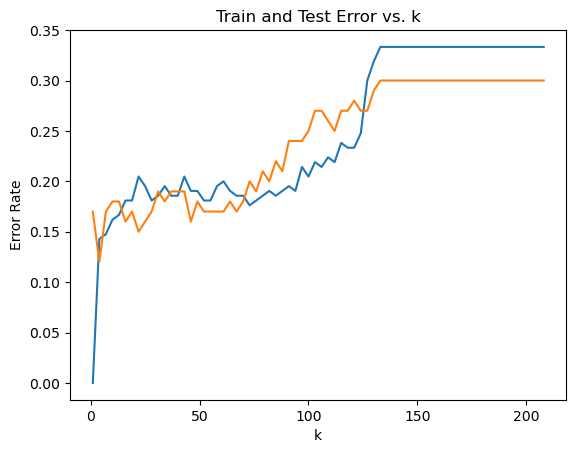

In [463]:
train_errors = []
test_errors = []
k_list = list(range(208, 0, -3))  
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(x_train, y_train)
    train_pred = knn.predict(x_train)
    test_pred = knn.predict(x_test)
    train_errors.append(1 - accuracy_score(y_train,train_pred))
    test_errors.append(1- accuracy_score(y_test,test_pred))
plt.plot(k_list, train_errors, label='Train Error')
plt.plot(k_list, test_errors, label='Test Error') 
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.title('Train and Test Error vs. k')
k_star, min_test_error = min(zip(k_list, test_errors), key=lambda x: x[1])
print(f"Best k: {k_star}, with test error: {min_test_error}")

# under best_knn: confusion matrics fro type 1 or 2 error  
from sklearn import metrics 
best_knn = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
best_knn.fit(x_train, y_train)
test_pred = best_knn.predict(x_test)
y_true=y_test
confusion_matrix = metrics.confusion_matrix(y_true, test_pred )
print("Confusion Matrix:\n", confusion_matrix)

# four matrix
tn, fp, fn, tp = confusion_matrix.ravel() 
true_positive_rate = (tp / (tp+fn)) 
print("true positive rate:\n",true_positive_rate)
true_negative_rate = (tn / (tn+fp)) 
print("true negative rate:\n",true_negative_rate)
precision = (tp / (tp+fp))
print("precision:\n",precision)
#F1-score when k= k∗
F1_score = 2*precision*true_positive_rate /(precision+true_positive_rate)
print("F1_score:\n",F1_score)


#### iii. Learning Curve

N=10, Best k=1, Error=0.230
N=30, Best k=1, Error=0.190
N=50, Best k=11, Error=0.270
N=70, Best k=26, Error=0.280
N=90, Best k=36, Error=0.280
N=110, Best k=6, Error=0.240
N=130, Best k=6, Error=0.200
N=150, Best k=1, Error=0.200
N=170, Best k=6, Error=0.160
N=190, Best k=1, Error=0.170
N=210, Best k=26, Error=0.150


<Axes: xlabel='Training Size'>

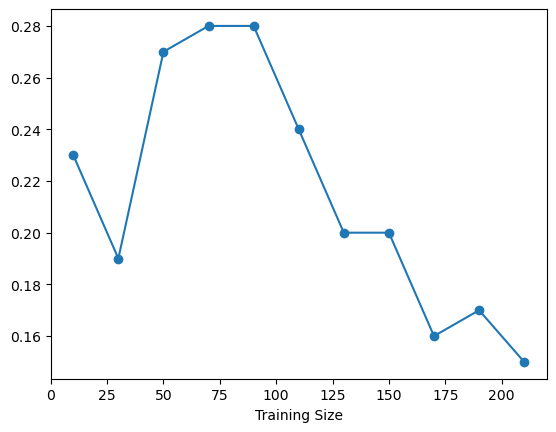

In [465]:
N_value = list(range(10, 211, 20))  # Fewer points to speed up
best_test_errors = []
for N in N_value: 
    class0 = N//3 
    class1 = N-class0
    sub_train0 = train[train['Class_Labelled']==0].head(class0)
    sub_train1 = train[train['Class_Labelled']==1].head(class1)
    sub_train = pd.concat([sub_train0,sub_train1]) 
    sub_train_x = sub_train.drop('Class_Labelled',axis=1)
    sub_train_x_scaled = scaler.fit_transform(sub_train_x)
    sub_train_y = sub_train['Class_Labelled']
    x_test = test.drop('Class_Labelled',axis=1)
    y_test = test['Class_Labelled'] 
    x_test = scaler.transform(x_test) 
    k_values = list(range(1, N, 5))
    N_test_errors = [] 
    for k in k_values: 
        if k >= len(sub_train):
            continue
        knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn.fit(sub_train_x_scaled, sub_train_y)
        train_pred = knn.predict(sub_train_x_scaled)
        test_pred = knn.predict(x_test)
        test_error=1- accuracy_score(y_test,test_pred)
        N_test_errors.append((k, test_error))
    if N_test_errors:
        k_best, min_test_error = min(N_test_errors, key=lambda x: x[1])
        best_test_errors.append((N, min_test_error))
        print(f"N={N}, Best k={k_best}, Error={min_test_error:.3f}")

df = pd.DataFrame(best_test_errors, columns=['Training Size', 'Test Error'])
df.plot(x='Training Size', y='Test Error', marker='o', legend=False)


### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

In [469]:
k_values = list(range(1,197,5))
error_list = []
train = pd.concat([column_2C[column_2C["Class_Labelled"] == 0].head(70),
                   column_2C[column_2C["Class_Labelled"]== 1].head(140)])
x_train = train.drop('Class_Labelled',axis=1)
y_train = train['Class_Labelled'] 
x_test = test.drop('Class_Labelled',axis=1)
y_test = test['Class_Labelled'] 
true_test = y_test
for k in k_values: 
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    knn.fit(x_train, y_train)
    test_predict = knn.predict(x_test)
    test_error = 1 - accuracy_score(true_test, test_predict)
    error_list.append((k,test_error)) 
best_k, min_error = min(error_list, key=lambda x: x[1])
print(f"Best k (Manhattan): {best_k}, Test Error: {min_error:.3f}")


Best k (Manhattan): 6, Test Error: 0.110


##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [471]:
import numpy as np
log_v_p = np.arange(0.1, 1.1, 0.1)
k_best = 6
p_error_list = []
for log in log_v_p: 
    p = 10 ** log
    knn = KNeighborsClassifier(n_neighbors=best_k, metric='minkowski', p=log)
    knn.fit(x_train, y_train)
    test_predict = knn.predict(x_test)
    test_error = 1 - accuracy_score(true_test, test_predict)
    p_error_list.append((log,test_error)) 
    
best_p,lowest_error = min(p_error_list,key=lambda x: x[1])
print(f"Best p (LOG): {best_p}, Test Error: {lowest_error:.3f}")
 

Best p (LOG): 0.9, Test Error: 0.110


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_base.py:654: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_base.py:654: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_base.py:654: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_base.py:654: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_base.py:654: UserWarning: Mind th

##### C. Chebyshev Distance With p -> infinity.

In [473]:
k_values = list(range(1,197,5))
chebyshev_error_list = []
for k in k_values: 
    knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    knn.fit(x_train, y_train)
    test_predict = knn.predict(x_test)
    test_error = 1 - accuracy_score(true_test, test_predict)
    chebyshev_error_list.append((k,test_error)) 
best_k, lowest_error = min(chebyshev_error_list,key=lambda x:x[1])
print(f'The Best K in Chebyshev Metric is: {best_k},Lowest Error:{lowest_error}')

The Best K in Chebyshev Metric is: 16,Lowest Error:0.07999999999999996


#### ii. Mahalanobis Distance.

In [475]:
from scipy.spatial.distance import mahalanobis
from sklearn.metrics import DistanceMetric
cov = np.cov(x_train.T)
inv_cov = np.linalg.inv(cov)
k_values = list(range(1,197,5))
mahalanobis_error_list = []
for k in k_values: 
    mahalanobis_metric = DistanceMetric.get_metric('mahalanobis', V=inv_cov)
    model = KNeighborsClassifier(n_neighbors=k, metric=mahalanobis_metric)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test) 
    test_error = 1 - accuracy_score(true_test, test_predict)
    mahalanobis_error_list.append((k,test_error)) 
best_k, min_error_maha = min(mahalanobis_error_list, key=lambda x: x[1])
print(f'The Best K in Mahalanobis Distance is: {best_k},Lowest Error:{lowest_error}')

The Best K in Mahalanobis Distance is: 1,Lowest Error:0.07999999999999996


### (e) Weighted Decision

In [477]:
k_values = list(range(1,197,5))
train = pd.concat([column_2C[column_2C["Class_Labelled"] == 0].head(70),
                   column_2C[column_2C["Class_Labelled"]== 1].head(140)])
x_train = train.drop('Class_Labelled',axis=1)
y_train = train['Class_Labelled'] 
x_test = test.drop('Class_Labelled',axis=1)
y_test = test['Class_Labelled'] 
true_test = y_test
for k in k_values: 
    knn = KNeighborsClassifier(n_neighbors=k, weights = "distance", metric='minkowski', p=1)
    knn.fit(x_train, y_train)
    test_predict = knn.predict(x_test)
    test_error = 1 - accuracy_score(true_test, test_predict)
    error_list.append((k,test_error)) 
best_k, min_error = min(error_list, key=lambda x: x[1])
euclidean_error_list = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights="distance", metric="euclidean")
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    test_error = 1 - accuracy_score(true_test, y_pred)
    euclidean_error_list.append((k,test_error)) 
best_k_euclidean, min_error_euclidean = min(euclidean_error_list, key=lambda x: x[1])
print(f'The Best K in minkowski Distance is: {best_k_minkowski},Lowest Error:{min_error_minkowski}')
minkowski_error_list = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights="distance", metric="minkowski",p=log)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    test_error = 1 - accuracy_score(true_test, y_pred)
    minkowski_error_list.append((k,test_error)) 
best_k_minkowski, min_error_minkowski = min(minkowski_error_list, key=lambda x: x[1])
print(f'The Best K in minkowski Distance is: {best_k_minkowski},Lowest Error:{min_error_minkowski}')
chebyshev_error_list = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights="distance", metric="chebyshev")
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    test_error = 1 - accuracy_score(true_test, y_pred)
    chebyshev_error_list.append((k,test_error)) 
best_k_chebyshev, min_error_chebyshev = min(chebyshev_error_list, key=lambda x: x[1])
print(f'The Best K in Chebyshev Distance is: {best_k_chebyshev},Lowest Error:{min_error_chebyshev}')

The Best K in minkowski Distance is: 26,Lowest Error:0.09999999999999998
The Best K in minkowski Distance is: 26,Lowest Error:0.09999999999999998
The Best K in Chebyshev Distance is: 16,Lowest Error:0.10999999999999999


### (f) Training Error Rate

When K = 1, the training error will be 0